In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for rectangle
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score # for r²

#setting global plot font, size etc
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('xtick.major', size=8,)
plt.rc('ytick.major', size=8,)
#plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] =14
plt.rcParams["legend.fontsize"] = 12

In [17]:
# importing data and converting to numpy array
d_ws5 = pd.read_csv("ws5.csv")
df_ws5 = pd.DataFrame(d_ws5)
f1 = df_ws5.to_numpy().T # converting the imported data to numpy array and transposing.
#df_ws5.head(5) # checking the imported data top 5 only

# importing data and converting to numpy array
d_Ms5 = pd.read_csv("Ms5.csv")
df_Ms5 = pd.DataFrame(d_Ms5)
f2 = df_Ms5.to_numpy().T # converting the imported data to numpy array and transposing.
#df_Ms5.head(5) # checking the imported data top 5 only

d_Ms1 = pd.read_csv("Ms1.csv")
df_Ms1 = pd.DataFrame(d_Ms1)
f3 = df_Ms1.to_numpy().T # converting the imported data to numpy array and transposing.
#df_Ms5.head(5) # checking the imported data top 5 only

d_ws1 = pd.read_csv("ws1.csv")
df_ws1 = pd.DataFrame(d_ws1)
f4 = df_ws1.to_numpy().T
#df_ws1.head(5)
d_Ms5.head(5)

,Msource,W,xwm_ar_5,Wm_ar_5,xwm_ar_10,Wm_ar_10,xwm_ar_15,Wm_ar_15,xwm_ar_20,Wm_ar_20
0,5.0,1.0,187.7,4.216582,203.0,4.293485,209.1,4.322139,212.1,4.3
1,5.0,2.0,537.9,7.785653,658.4,8.175516,717.7,8.344401,750.9,8.4
2,5.0,3.0,859.8,10.745378,1160.2,11.558476,1332.9,11.955310,1439.2,12.2
3,5.0,4.0,1112.4,13.296696,1618.4,14.526489,1939.8,15.181998,2151.8,15.6
4,5.0,5.0,1295.5,15.593593,2008.1,17.184552,2491.9,18.093653,2826.8,18.7


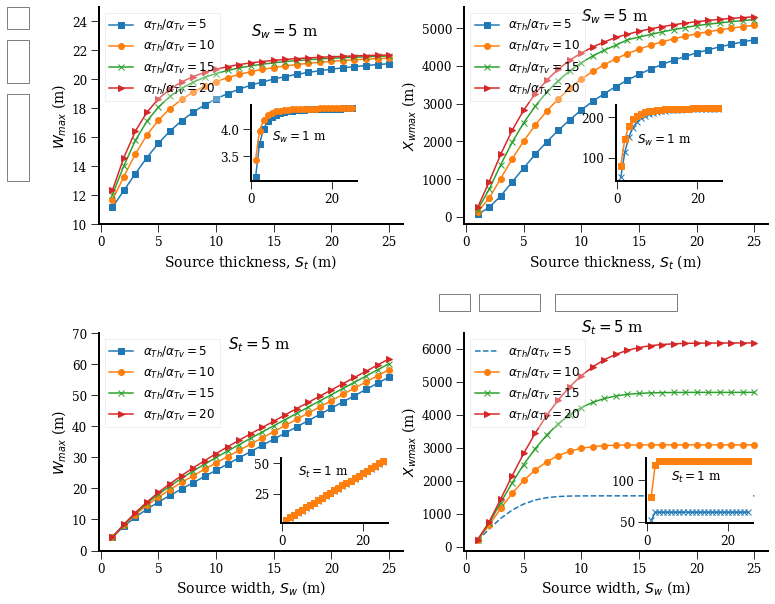

In [6]:
# Plotting

fig, axs = plt.subplots(2, 2, figsize=(12,10)) # create 4 plots as 2x2
plt.subplots_adjust(hspace= 0.5)


# creating legend names
legend =[r"$\alpha_{Th}/\alpha_{Tv} = 5$", r"$\alpha_{Th}/\alpha_{Tv} = 10$", 
         r"$\alpha_{Th}/\alpha_{Tv} = 15$", r"$\alpha_{Th}/\alpha_{Tv} = 20$"]

# main plot f1 is numpy array we defined and [x] is the wmax column number.
#Count starts from zero, see table above. axs[0,0] = row = 0, col= 0
axs[0,0].plot(f1[1],f1[3], 's-', f1[1],f1[5], 'o-', f1[1],f1[7],'x-', f1[1],f1[9],'>-')

axs[0,0].set_xlabel(r"Source thickness, $S_t$ (m)")
axs[0,0].set_ylabel(r"$W_{max}$ (m)")
#axs[0,0].legend(r"\alpha_{Th}/\alpha_{Tv} = 5", loc=2)
axs[0,0].legend(legend, loc = 2, fancybox=False,framealpha=0.3) # # transparent legend box
axs[0,0].text(13, 23, r"$S_w = 5$ m", fontsize= 15)
axs[0,0].set_ylim([10, 25])

# creating scenario shapes
rect1 = patches.Rectangle((-0.3,0.9),width=0.07, height=0.1,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0,0].transAxes, clip_on=False)
rect2 = patches.Rectangle((-0.3,0.65),width=0.07, height=0.2,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0,0].transAxes, clip_on=False)
rect3 = patches.Rectangle((-0.3,0.2),width=0.07, height=0.4,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0,0].transAxes, clip_on=False)

#horizontal scenario
rect4 = patches.Rectangle((1.12, -0.4),width=0.1, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0,0].transAxes, clip_on=False)
rect5 = patches.Rectangle((1.25, -0.4),width=0.2, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0,0].transAxes, clip_on=False)
rect6 = patches.Rectangle((1.50,-0.4),width=0.4, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0,0].transAxes, clip_on=False)
# add rect.
axs[0,0].add_patch(rect1)
axs[0,0].add_patch(rect2)
axs[0,0].add_patch(rect3)
axs[1,0].add_patch(rect4)
axs[1,0].add_patch(rect5)
axs[1,0].add_patch(rect6)
 
# inset1 for figure top-left axs[0,0]
ins1 = axs[0,0].inset_axes([0.5, 0.2, 0.35, 0.35]) # [left, bottom, width, height]
ins1.plot(f4[1], f4[3],'s-', f4[1], f4[5],'o-')
#ins1.set_xlabel(r"$S_{t}$ (m) ", )
#ins1.set_ylabel(r"$W_{max}$ (m)", )
ins1.text(5, 3.8, r"$S_w = 1$ m", fontsize= 12)

axs[0,1].plot(f1[1],f1[2], 's-', f1[1],f1[4], 'o-', f1[1],f1[6],'x-', f1[1],f1[8],'>-' )
axs[0,1].set_xlabel(r"Source thickness, $S_t$ (m)")
axs[0,1].set_ylabel(r"$X_{wmax}$ (m)")
axs[0,1].legend(legend, loc = 2, fancybox=False,framealpha=0.3) # transparent legend box
axs[0,1].text(10, 5200, r"$S_w = 5$ m", fontsize= 15)


ins2 = axs[0,1].inset_axes([0.5, 0.2, 0.35, 0.35]) # [left, bottom, width, height]
ins2.plot(f4[1], f4[2], '-x', f4[1], f4[4], '-s')
#ins2.set_xlabel(r"$S_{t}$", )
#ins2.set_ylabel(r"$W_{max}$ (m)", )
ins2.text(5, 135, r"$S_w = 1$ m", fontsize= 12)

# copy paste the codes after adding data


axs[1,0].plot(f2[1],f2[3], 's-', f2[1],f2[5], 'o-', f2[1],f2[7],'x-', f2[1],f2[9],'>-')

axs[1,0].set_xlabel(r"Source width, $S_w$ (m)")
axs[1,0].set_ylabel(r"$W_{max}$ (m)")
#axs[0,0].legend(r"\alpha_{Th}/\alpha_{Tv} = 5", loc=2)
axs[1,0].legend(legend, loc = 2, fancybox=False,framealpha=0.3) # # transparent legend box
axs[1,0].text(11, 65, r"$S_t = 5$ m", fontsize= 15)
axs[1,0].set_ylim([0, 70])


axs[1,1].plot( f2[1],f2[2], '--', f2[1],f2[4], 'o-', f2[1],f2[6],'x-', f2[1],f2[8],'>-')
#f2[1],f2[2], 's-', f2[1],f2[4], 'o-',
axs[1,1].set_xlabel(r"Source width, $S_w$ (m)")
axs[1,1].set_ylabel(r"$X_{wmax}$ (m)")
axs[1,1].legend(legend, loc = 2, fancybox=False,framealpha=0.3) # transparent legend box
axs[1,1].text(10, 6500, r"$S_t = 5$ m", fontsize= 15)

#inset for horizontal scenario
ins3 = axs[1,0].inset_axes([0.6, 0.125, 0.35, 0.30]) # [left, bottom, width, height]
ins3.plot(f3[1], f3[3], '-x', f3[1], f3[5], '-s')
#ins2.set_xlabel(r"$S_{t}$", )
#ins2.set_ylabel(r"$W_{max}$ (m)", )
ins3.text(4, 40, r"$S_t = 1$ m", fontsize= 12)

ins4 = axs[1,1].inset_axes([0.6, 0.125, 0.35, 0.30]) # [left, bottom, width, height]
ins4.plot(f3[1], f3[2], '-x', f3[1], f3[4], '-s')
#ins2.set_xlabel(r"$S_{t}$", )
#ins2.set_ylabel(r"$W_{max}$ (m)", )
ins4.text(6, 100, r"$S_t = 1$ m", fontsize= 12)

plt.savefig("fig2.pdf", dpi = 300)

In [10]:
# log function - a + b* log(x)
def log_func(x,a,b):
    return a + b*np.log10(x) # it should be log10 and not log=ln

#def log_func(x,a,b):
#   return a + b*np.log10(x) # it should be log10 and not log=ln

def exp_func(x, a, b):
    return a*np.exp(b*x)

In [12]:
# case 1 Ms= 2 m, ath/atv = 15

d1 = pd.read_csv("Ms_2m_a_15.csv", nrows = 25)
d1.to_numpy

x = d1["As"]
y = d1["Log_Ar"]
z = d1["Log_Att"]
av = np.log10((d1["Arect"] + d1["Att"])/2)
#d1.tail(5)

In [13]:
# case 2 Ws= 2 m, ath/atv = 15

d2 = pd.read_csv("Ws_2m_a_15.csv", nrows = 25)
d2.to_numpy

x1 = d2["As"]
y1 = d2["Log_Ar"]
z1 = d2["Log_Att"]
av1 = np.log10((d2["Arect"] + d2["Att"])/2)
#d2.tail(5)

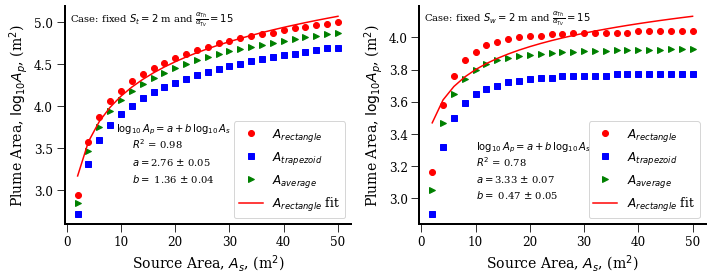

In [15]:
#fit case 1
popt_a,pcov_a = curve_fit(log_func,x,y) # log10 fit overestimate area and obtain fit parameter
pred1_a = log_func(x, popt_a[0], popt_a[1] ) # obtain fit curve log10
r2_a = r2_score(y,pred1_a)

#fit case 2
popt_a1,pcov_a1 = curve_fit(log_func,x1,y1) # log10 fit overestimate area and obtain fit parameter
pred1_a1 = log_func(x1, popt_a1[0], popt_a1[1] ) # obtain fit curve log10
r2_a1 = r2_score(y1,pred1_a1)

#plot

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x, y, 'or', label = r"$A_{rectangle}$")
ax[0].plot(x, z, 'sb', label = r"$A_{trapezoid}$")
ax[0].plot(x, av, '>g', label = r"$A_{average}$")
ax[0].plot(x, pred1_a, "-r", label=r'$A_{rectangle}$ fit')


st0 = r"$\log_{10}\, A_p = a + b \, \log_{10}\, A_s$"
st1 = r"$R^2$ = %.2f " %r2_a
st2 = r"$a = $%.2f $\pm$ %.2f" %(popt_a[0], pcov_a[0,0]**0.5)
st3 = r"$b =$ %.2f $\pm$ %.2f" %(popt_a[1], pcov_a[1,1]**0.5)
stt1 = r" Case: fixed $S_t = 2$ m and $\frac{\alpha_{Th}}{\alpha_{Tv}} = 15 $"

ax[0].text(9, 3.7, st0)
ax[0].text(12, 3.5, st1)
ax[0].text(12, 3.3, st2)
ax[0].text(12, 3.1, st3)
ax[0].text(0, 5, stt1)

ax[0].set_xlabel(r"Source Area, $A_s$, (m$^2$)")
ax[0].set_ylabel(r"Plume Area, $\log_{10} A_p$, (m$^2$)")
ax[0].legend();

#plot case 2

ax[1].plot(x1, y1, 'or', label = r"$A_{rectangle}$")
ax[1].plot(x1, z1, 'sb', label = r"$A_{trapezoid}$")
ax[1].plot(x1, av1, '>g', label = r"$A_{average}$")
ax[1].plot(x1, pred1_a1, "-r", label=r'$A_{rectangle}$ fit')

st4 = r"$\log_{10}\, A_p = a + b \, \log_{10}\, A_s$"
st5 = r"$R^2$ = %.2f " %r2_a1
st6 = r"$a = $%.2f $\pm$ %.2f" %(popt_a1[0], pcov_a1[0,0]**0.5)
st7 = r"$b =$ %.2f $\pm$ %.2f" %(popt_a1[1], pcov_a1[1,1]**0.5)
stt2 = r" Case: fixed $S_w = 2$ m and $\frac{\alpha_{Th}}{\alpha_{Tv}} = 15 $"

ax[1].text(10, 3.3, st4)
ax[1].text(10, 3.2, st5)
ax[1].text(10, 3.1, st6)
ax[1].text(10, 3.0, st7)
ax[1].text(0, 4.1, stt2)

ax[1].set_xlabel(r"Source Area, $A_s$, (m$^2$)")
ax[1].set_ylabel(r"Plume Area, $\log_{10} A_p$, (m$^2$)")
ax[1].legend();

fig.tight_layout()
fig.savefig("fig3.pdf", dpi = 300)